In [1]:
import os
import numpy as np
import pandas as pd
import pkg_resources
import matplotlib.pyplot as plt
print('pandas',pkg_resources.get_distribution("pandas").version)
print('numpy',pkg_resources.get_distribution("numpy").version)
print('matplotlib',pkg_resources.get_distribution("numpy").version)


def get_locus_count_information(input_dir):
    original_dir = os.getcwd()
    os.chdir(input_dir)
    dir_of_line_count = {}
    for file in os.listdir('.'):
        if not file.endswith("processed_filtered.bed"):
            continue
        infile = open(file,'rt')
        line_count = 0
        for line in infile:
            if line.startswith("#"):
                continue
            if "chrX" in line:
                continue
            line_count +=1
        split_file = file.split("_")
        dir_of_line_count[f"{split_file[0]}_{split_file[3]}_{split_file[7]}"] = line_count
        #print(dict_key)
        #print(line_count,file)
        infile.close()
    os.chdir(original_dir)
    return dir_of_line_count
def process_dict_of_line(input_dict):
    element_types = ["LINEs","SINEs"]
    for element in element_types:
        dict_of_query = {}
        dict_of_ref = {}
        for key in input_dict.keys():
            if element not in key:
                continue
            if "query" in key:
                dict_of_query[key.split("_")[0]] = input_dict[key]
            else:
                dict_of_ref[key.split("_")[0]] = input_dict[key]
        print(dict_of_query)
        print(dict_of_ref)
                
        #get the stats
        dict_of_sums = {}
        for key in dict_of_query.keys():
            dict_of_sums[key] = dict_of_query[key] + dict_of_ref[key]
        print(sum(dict_of_sums.values())/len(dict_of_sums.values()),min(dict_of_sums.values()),max(dict_of_sums.values()))
        
        
        #now get the mean and std for query and ref
        for dictionary in [dict_of_query,dict_of_ref]:
            mean = sum(dictionary.values())/len(dictionary.values())
            stdev = np.std(list(dictionary.values()),ddof=1)
            print(mean,stdev)
            
            


pandas 1.3.4
numpy 1.20.3
matplotlib 1.20.3


In [2]:
dir_contents = get_locus_count_information("Revised_All_Canines_List_2025_08_06")
process_dict_of_line(dir_contents)


{'Sandy': 2040, 'Mischka': 1801, 'Tasha': 1806, 'Clu': 1436, 'Nala': 1803, 'Zoey': 1813}
{'Clu': 1634, 'Sandy': 1717, 'Mischka': 1713, 'Tasha': 1722, 'Nala': 1736, 'Zoey': 1759}
3496.6666666666665 3070 3757
1783.1666666666667 194.22195207202162
1713.5 42.38277952187657
{'Zoey': 11962, 'Clu': 12375, 'Nala': 13739, 'Tasha': 10169, 'Mischka': 13901, 'Sandy': 14465}
{'Sandy': 12957, 'Nala': 12675, 'Tasha': 13115, 'Mischka': 12626, 'Clu': 12251, 'Zoey': 13110}
25557.5 23284 27422
12768.5 1591.5541775258548
12789.0 336.61550766415974


In [3]:
def extract_file_contents(infile):
    rate_file = open(infile,'rt')
    file_contents = rate_file.readlines()
    rate_file.close()
    
    final_dict = {}
    for i in range(len(file_contents)):
        #print(i)
        if i == 0:
            enum_dict = {}
            for x, y in enumerate(file_contents[i].split()):
                enum_dict[x] = y
            #print(enum_dict)
            continue
        current_sample = file_contents[i].split()
        for j in range(len(current_sample)):    
            if enum_dict[j] not in final_dict.keys():
                if j == 0:
                    final_dict[enum_dict[j]] = [current_sample[j]]
                else:
                    final_dict[enum_dict[j]] = [float(current_sample[j])]
            else:
                if j == 0:
                    final_dict[enum_dict[j]].append(current_sample[j])
                else:
                    final_dict[enum_dict[j]].append(float(current_sample[j]))
    
    #print(final_dict)
    return final_dict
def get_average_and_stdev_of_data(dictionary):
    dictionary['Sample_Name'].append('Average')
    dictionary['Sample_Name'].append("stdev")
    
    key_names = list(dictionary.keys())
    for i in range(len(key_names)):
        if key_names[i] == 'Sample_Name':
            continue
        
        mean = sum(dictionary[key_names[i]])/len(dictionary[key_names[i]])
        stdev = np.std(dictionary[key_names[i]],ddof=1)
        dictionary[key_names[i]].append(round(mean,2))
        dictionary[key_names[i]].append(round(stdev,2))
        print(key_names[i],dictionary[key_names[i]])
        
    #print mean and stdev of each value
    for i in range(len(key_names)):
        print(key_names[i],dictionary[key_names[i]][-2],dictionary[key_names[i]][-1])
        
    return dictionary
def create_ref_added_rate_information(dictionary):
    ref_added_dict = {}
    for key in dictionary.keys():
        if "ref" in key:
            continue
        ref_added_dict[key] = dictionary[key]
        if "query" in key:
            #print(key,key.replace("query","ref"))
            ref_added_dict[key].append(dictionary[key.replace("query","ref")][0])
        elif key == 'Sample_Name':
            ref_added_dict[key].append(f"{dictionary[key][0]}_ref")
    #print(ref_added_dict)
    return ref_added_dict


def add_mean_and_SD_to_file(input_file,input_dict):
    outfile_name = input_file + "_with_means.txt"
    out = open(outfile_name,'wt')
    with open(input_file,"rt") as infile:
        for line in infile:
            out.write(line)
    avg_index = -2
    sd_index = -1
    avg_line = []
    sd_line = []
    for key in input_dict.keys():
        avg_line.append(input_dict[key][avg_index])
        sd_line.append(input_dict[key][sd_index])
    print(avg_line,sd_line)
    
    for line in [avg_line,sd_line]:
        line = [str(x) for x in line]
        line = "\t".join(line) + "\n"
        out.write(line)
    out.close()
def create_ref_added_hallmarks_information(dictionary):
    ref_added_dict = {}
    for key in dictionary.keys():
        #first query name to show up will be the sample compared for REF. In this case it is GSD1
        if key == 'Sample_Name':
            list_of_sample_names = []
            list_of_sample_indices = []
            first_query = ""
            for i in range(len(dictionary[key])):
                #print(dictionary[key][i])
                if "query" in dictionary[key][i]:
                    list_of_sample_names.append(dictionary[key][i])
                    list_of_sample_indices.append(i)
            for i in range(len(dictionary[key])):
                if dictionary[key][i].split("_")[0] == list_of_sample_names[0].split("_")[0] and "ref" in dictionary[key][i]:
                   # print(dictionary[key][i],i)
                    list_of_sample_names.append(dictionary[key][i])
                    list_of_sample_indices.append(i)
            #print(list_of_sample_names,list_of_sample_indices)
            ref_added_dict[key] = list_of_sample_names
            continue
        
        current_list = []
        for i in list_of_sample_indices:
            current_list.append(dictionary[key][i])
        ref_added_dict[key] = current_list
            
    #print(ref_added_dict)
    return ref_added_dict
def extract_means_from_rate_file(infile):
    
    #print('here')
    final_dict = extract_file_contents(infile)
    
    #dictionary is now cleanly split into query variables and ref variables.
    #For each variable let us add GSD1_mCanlor ref as part of the sample list so that it is included exactly once
    #print(final_dict)
    
    if "Rate_information" in infile:
        ref_added_dict = create_ref_added_rate_information(final_dict)
    else:
        ref_added_dict = create_ref_added_hallmarks_information(final_dict)
        #print(final_dict)
    ref_added_dict = get_average_and_stdev_of_data(ref_added_dict)
    #return
    add_mean_and_SD_to_file(infile,ref_added_dict)


for state in ['SINE','LINE']:
    print(state)
    dir_contents = extract_means_from_rate_file(f"Revised_All_Canines_List_2025_08_06/Fig_Save/Rate_information_post_processing_{state}.txt")
    print("\n\n\n")
    #break
for state in ['SINE','LINE']:
        dir_contents = extract_means_from_rate_file(f"Revised_All_Canines_List_2025_08_06/Fig_Save/Hallmark_fractions_{state}.txt")
        print("\n\n\n")


SINE
SNP_total [4215336.0, 4334667.0, 4106418.0, 4093682.0, 4324997.0, 4067337.0, 4190406.17, 119250.13]
auto_length [2022141046.0, 2046499441.0, 2019420349.0, 2029408107.0, 2050780173.0, 2053788572.0, 2037006281.33, 15162176.25]
x_count_permissive_query_SINE [642.0, 623.0, 472.0, 613.0, 682.0, 426.0, 554.0, 573.14, 93.91]
auto_count_permissive_query_SINE [13901.0, 13739.0, 10169.0, 11962.0, 14465.0, 12375.0, 12626.0, 12748.14, 1453.88]
SINE_auto_count_hc_query [11614.0, 11546.0, 8384.0, 9541.0, 12195.0, 10257.0, 10449.0, 10569.43, 1331.24]
upper_SNP_bound_genome_divergence_in_generations [146802.0, 149161.0, 143202.0, 142055.0, 148518.0, 139465.0, 144867.17, 3882.62]
SINE_query_inverse_rate_upper_SNP_bound [10.561, 10.857, 14.082, 11.876, 10.267, 11.27, 11.627, 11.51, 1.27]
SINE_query_inverse_rate_hc_upper_SNP_bound [12.64, 12.919, 17.08, 14.889, 12.179, 13.597, 14.049, 13.91, 1.67]
lower_SNP_bound_genome_divergence_in_generations [400883.0, 407325.0, 391051.0, 387919.0, 405568.0, 380

In [4]:
#Find if there is an enrichment in variants on the x chromosome
information_file = "/nfs/turbo/umms-jmkidd/matt-projects/Former_KiddLabScratch_Data/inter-genome_comparisons/Aligning_Using_2.26/Prep_Files/Canine_Comparison_Revised_Canine_List.txt"
directory = "Revised_All_Canines_List_2025_08_06/"
def create_chrom_list():
    allow_chroms = []
    for i in range(38):
        allow_chroms.append(f"chr{i+1}")
    allow_chroms.append("chrX")
    return allow_chroms

def process_fasta_index(fasta_file,allow_chroms):
    fasta = open(fasta_file,'rt')
    length_dict = {}
    for line in fasta:
        line = line.split()
        if line[0] in allow_chroms:
            length_dict[line[0]] = int(line[1])#line[0] is chrom name line[1] is chrom length
    fasta.close()
    return length_dict

def create_empty_counter(allow_chroms):
    empty_dict = {}
    for chrom in allow_chroms:
        empty_dict[chrom] = 0
    return empty_dict
def get_count_of_loci_by_chrom(variant_file,counter_dict):
    infile = open(variant_file,'rt')
    for line in infile.readlines()[1::]:
        counter_dict[line.split()[0]] +=1
    infile.close()
    return counter_dict

def calculate_vars_per_mb(length_dict,count_dict):
    out_dict = {}
    for key in length_dict.keys():
        #print(length_dict[key],count_dict[key])
        #print((count_dict[key]/length_dict[key])*1000000)
        out_dict[key] = (count_dict[key]/length_dict[key])*1000000
    return out_dict    
def find_variants_per_mb_in_genome(info_file,directory):
    allow_chroms = create_chrom_list()
    infile = open(info_file,'rt')
    sample_names = []
    final_dict = {}
    for line in infile:
        if line.startswith("#"):
            continue
        fai = line.split()[1] + ".fai"
        sample = line.split()[0]
        length_dict = process_fasta_index(fai,allow_chroms)
    
    #for sample in sample_names:
        if sample == "mCanlor":
            continue #this is because everything is compared against mCanlor
        ref_LINE = get_count_of_loci_by_chrom(f"{directory}/{sample}_mCanlor_SV_ref_filled_intersect_with_LINEs_processed_filtered.bed",create_empty_counter(allow_chroms))
        ref_SINE = get_count_of_loci_by_chrom(f"{directory}/{sample}_mCanlor_SV_ref_filled_intersect_with_SINEs_processed_filtered.bed",create_empty_counter(allow_chroms))
        query_LINE = get_count_of_loci_by_chrom(f"{directory}/{sample}_mCanlor_SV_query_filled_intersect_with_LINEs_processed_filtered.bed",create_empty_counter(allow_chroms))
        query_SINE = get_count_of_loci_by_chrom(f"{directory}/{sample}_mCanlor_SV_query_filled_intersect_with_SINEs_processed_filtered.bed",create_empty_counter(allow_chroms))
        #print(ref_LINE)
        
        ref_var_per_mb_LINE = calculate_vars_per_mb(length_dict,ref_LINE)
        ref_var_per_mb_SINE = calculate_vars_per_mb(length_dict,ref_SINE)
        query_var_per_mb_LINE = calculate_vars_per_mb(length_dict,query_LINE)
        query_var_per_mb_SINE = calculate_vars_per_mb(length_dict,query_SINE)
        
        final_dict[sample] = {"ref_LINEs":ref_var_per_mb_LINE,"ref_SINEs":ref_var_per_mb_SINE,"query_LINEs":query_var_per_mb_LINE,"query_SINEs":query_var_per_mb_SINE}
    infile.close()
    
    return final_dict
variants_per_MB_dict = find_variants_per_mb_in_genome(information_file,directory)



In [5]:
#def get_average_var_per_MB_by_sample_type(variants_dict):
    #for key in variants_dict:
        #print(key,variants_dict[key]['query_LINEs'])
#get_average_var_per_MB_by_sample_type(variants_per_MB_dict)
vals = []
for key in variants_per_MB_dict:
    if key != "Clu":
        vals.append(variants_per_MB_dict[key]['query_LINEs']['chrX']/variants_per_MB_dict[key]['query_LINEs']['chr1'])
    print(key,variants_per_MB_dict[key]['query_LINEs']['chrX']/variants_per_MB_dict[key]['query_LINEs']['chr1'])
print("avg",sum(vals)/len(vals))

Clu 1.5389296646438488
Mischka 2.094090520158934
Zoey 1.696250953823801
Nala 1.768055232679746
Sandy 2.1905697837640554
Tasha 1.7546089395738256
avg 1.9007150860000723


[['LINEs', 'query'], ['LINEs', 'ref'], ['SINEs', 'query'], ['SINEs', 'ref']]
LINE-1 ['LINEs', 'query']
Mischka ['LINEs', 'query']
Nala ['LINEs', 'query']
Tasha ['LINEs', 'query']
Zoey ['LINEs', 'query']
Sandy ['LINEs', 'query']
Clu ['LINEs', 'query']
LINE-1


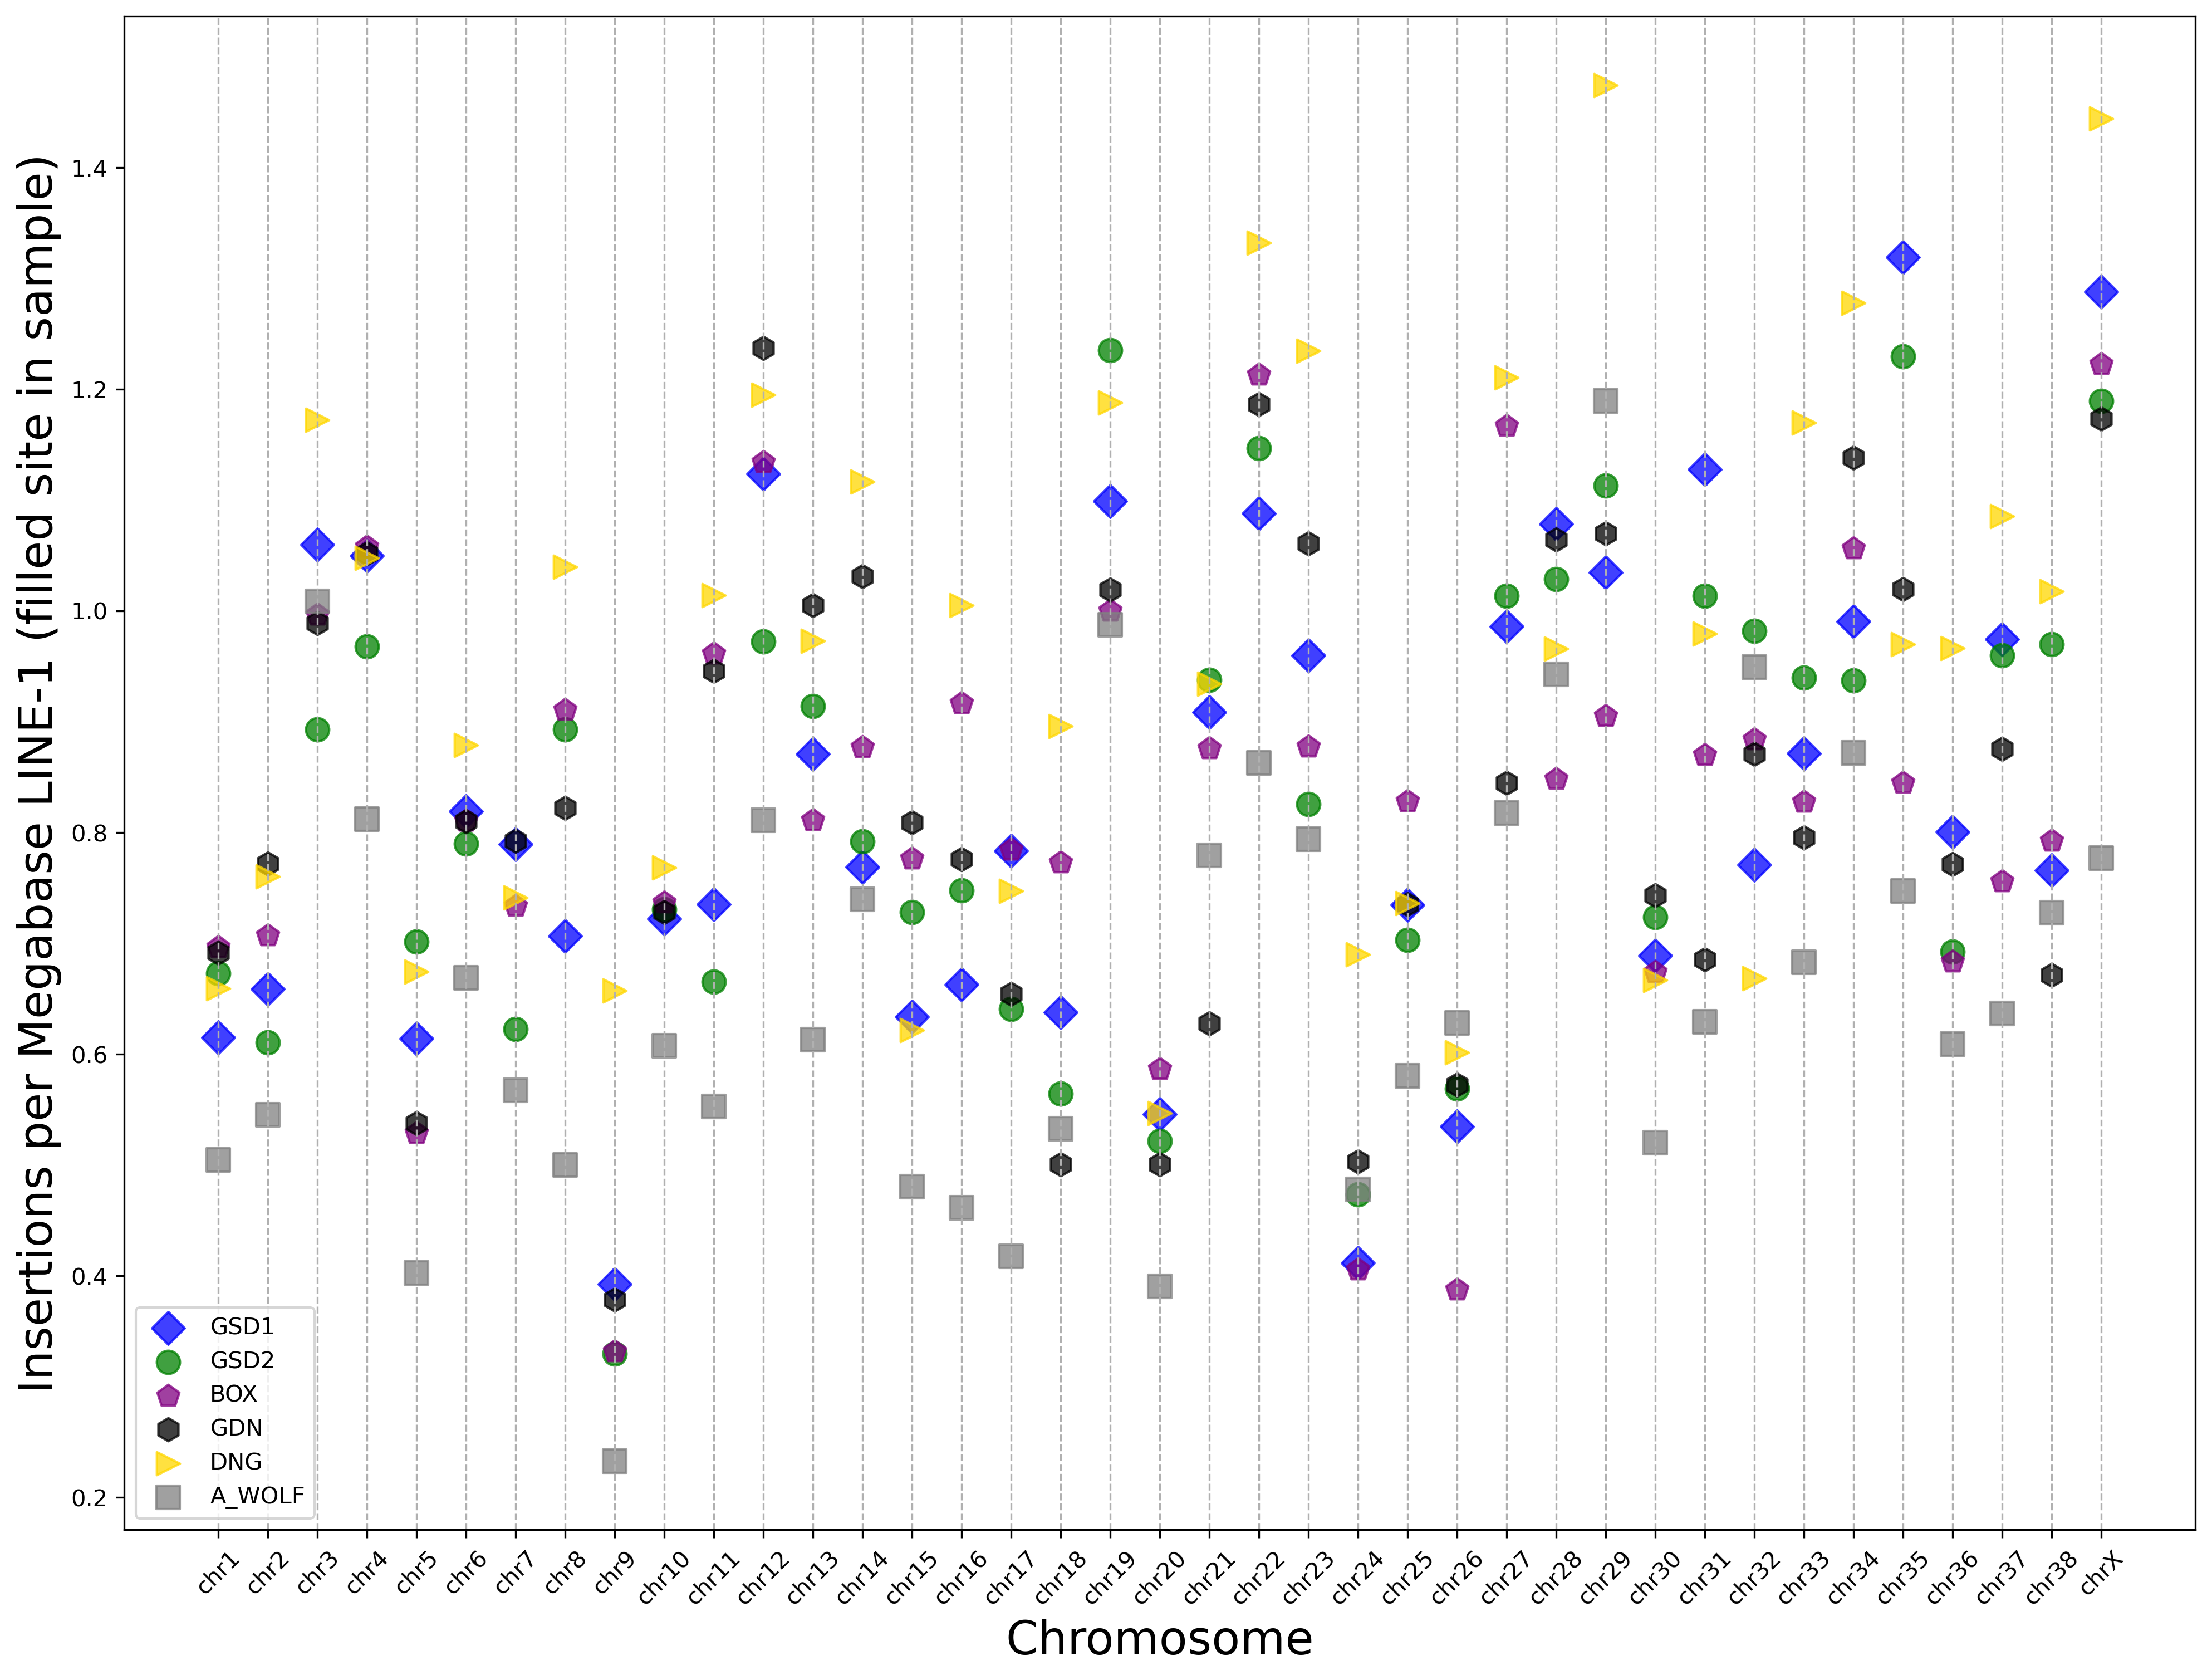

LINE-1 ['LINEs', 'ref']
Mischka ['LINEs', 'ref']
Nala ['LINEs', 'ref']
Tasha ['LINEs', 'ref']
Zoey ['LINEs', 'ref']
Sandy ['LINEs', 'ref']
Clu ['LINEs', 'ref']
LINE-1


<Figure size 432x288 with 0 Axes>

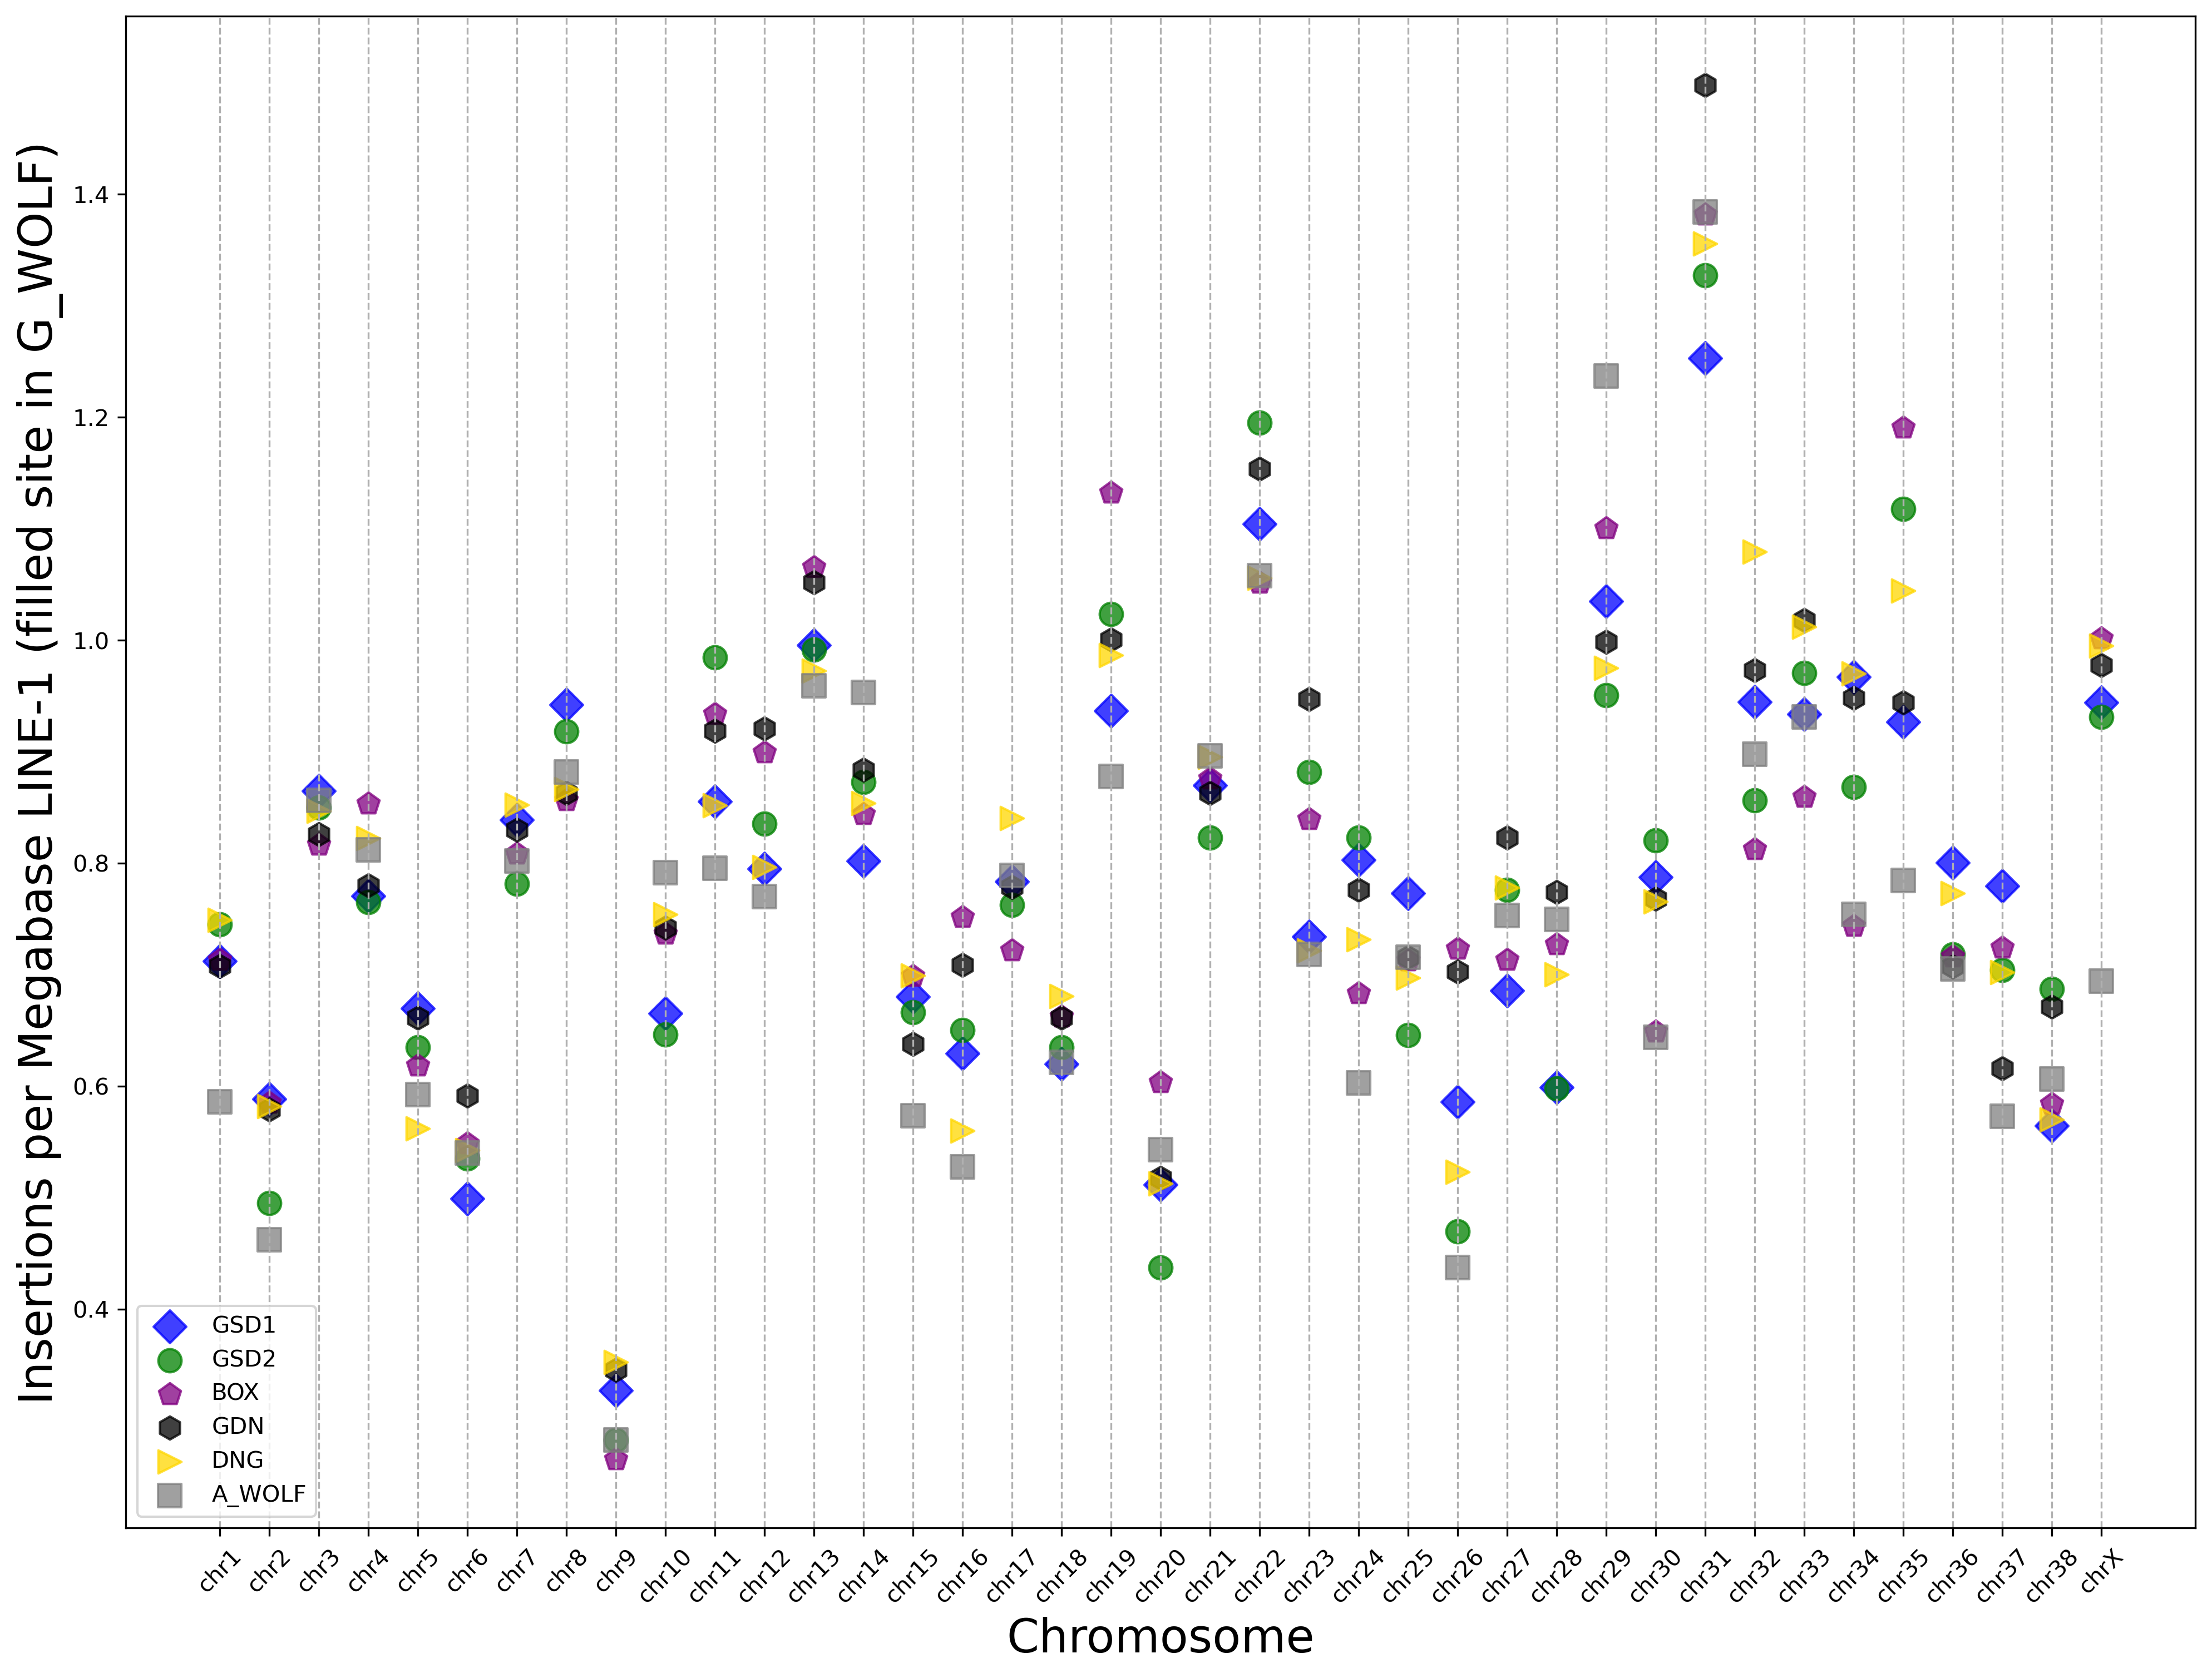

SINEC ['SINEs', 'query']
Mischka ['SINEs', 'query']
Nala ['SINEs', 'query']
Tasha ['SINEs', 'query']
Zoey ['SINEs', 'query']
Sandy ['SINEs', 'query']
Clu ['SINEs', 'query']
SINEC


<Figure size 432x288 with 0 Axes>

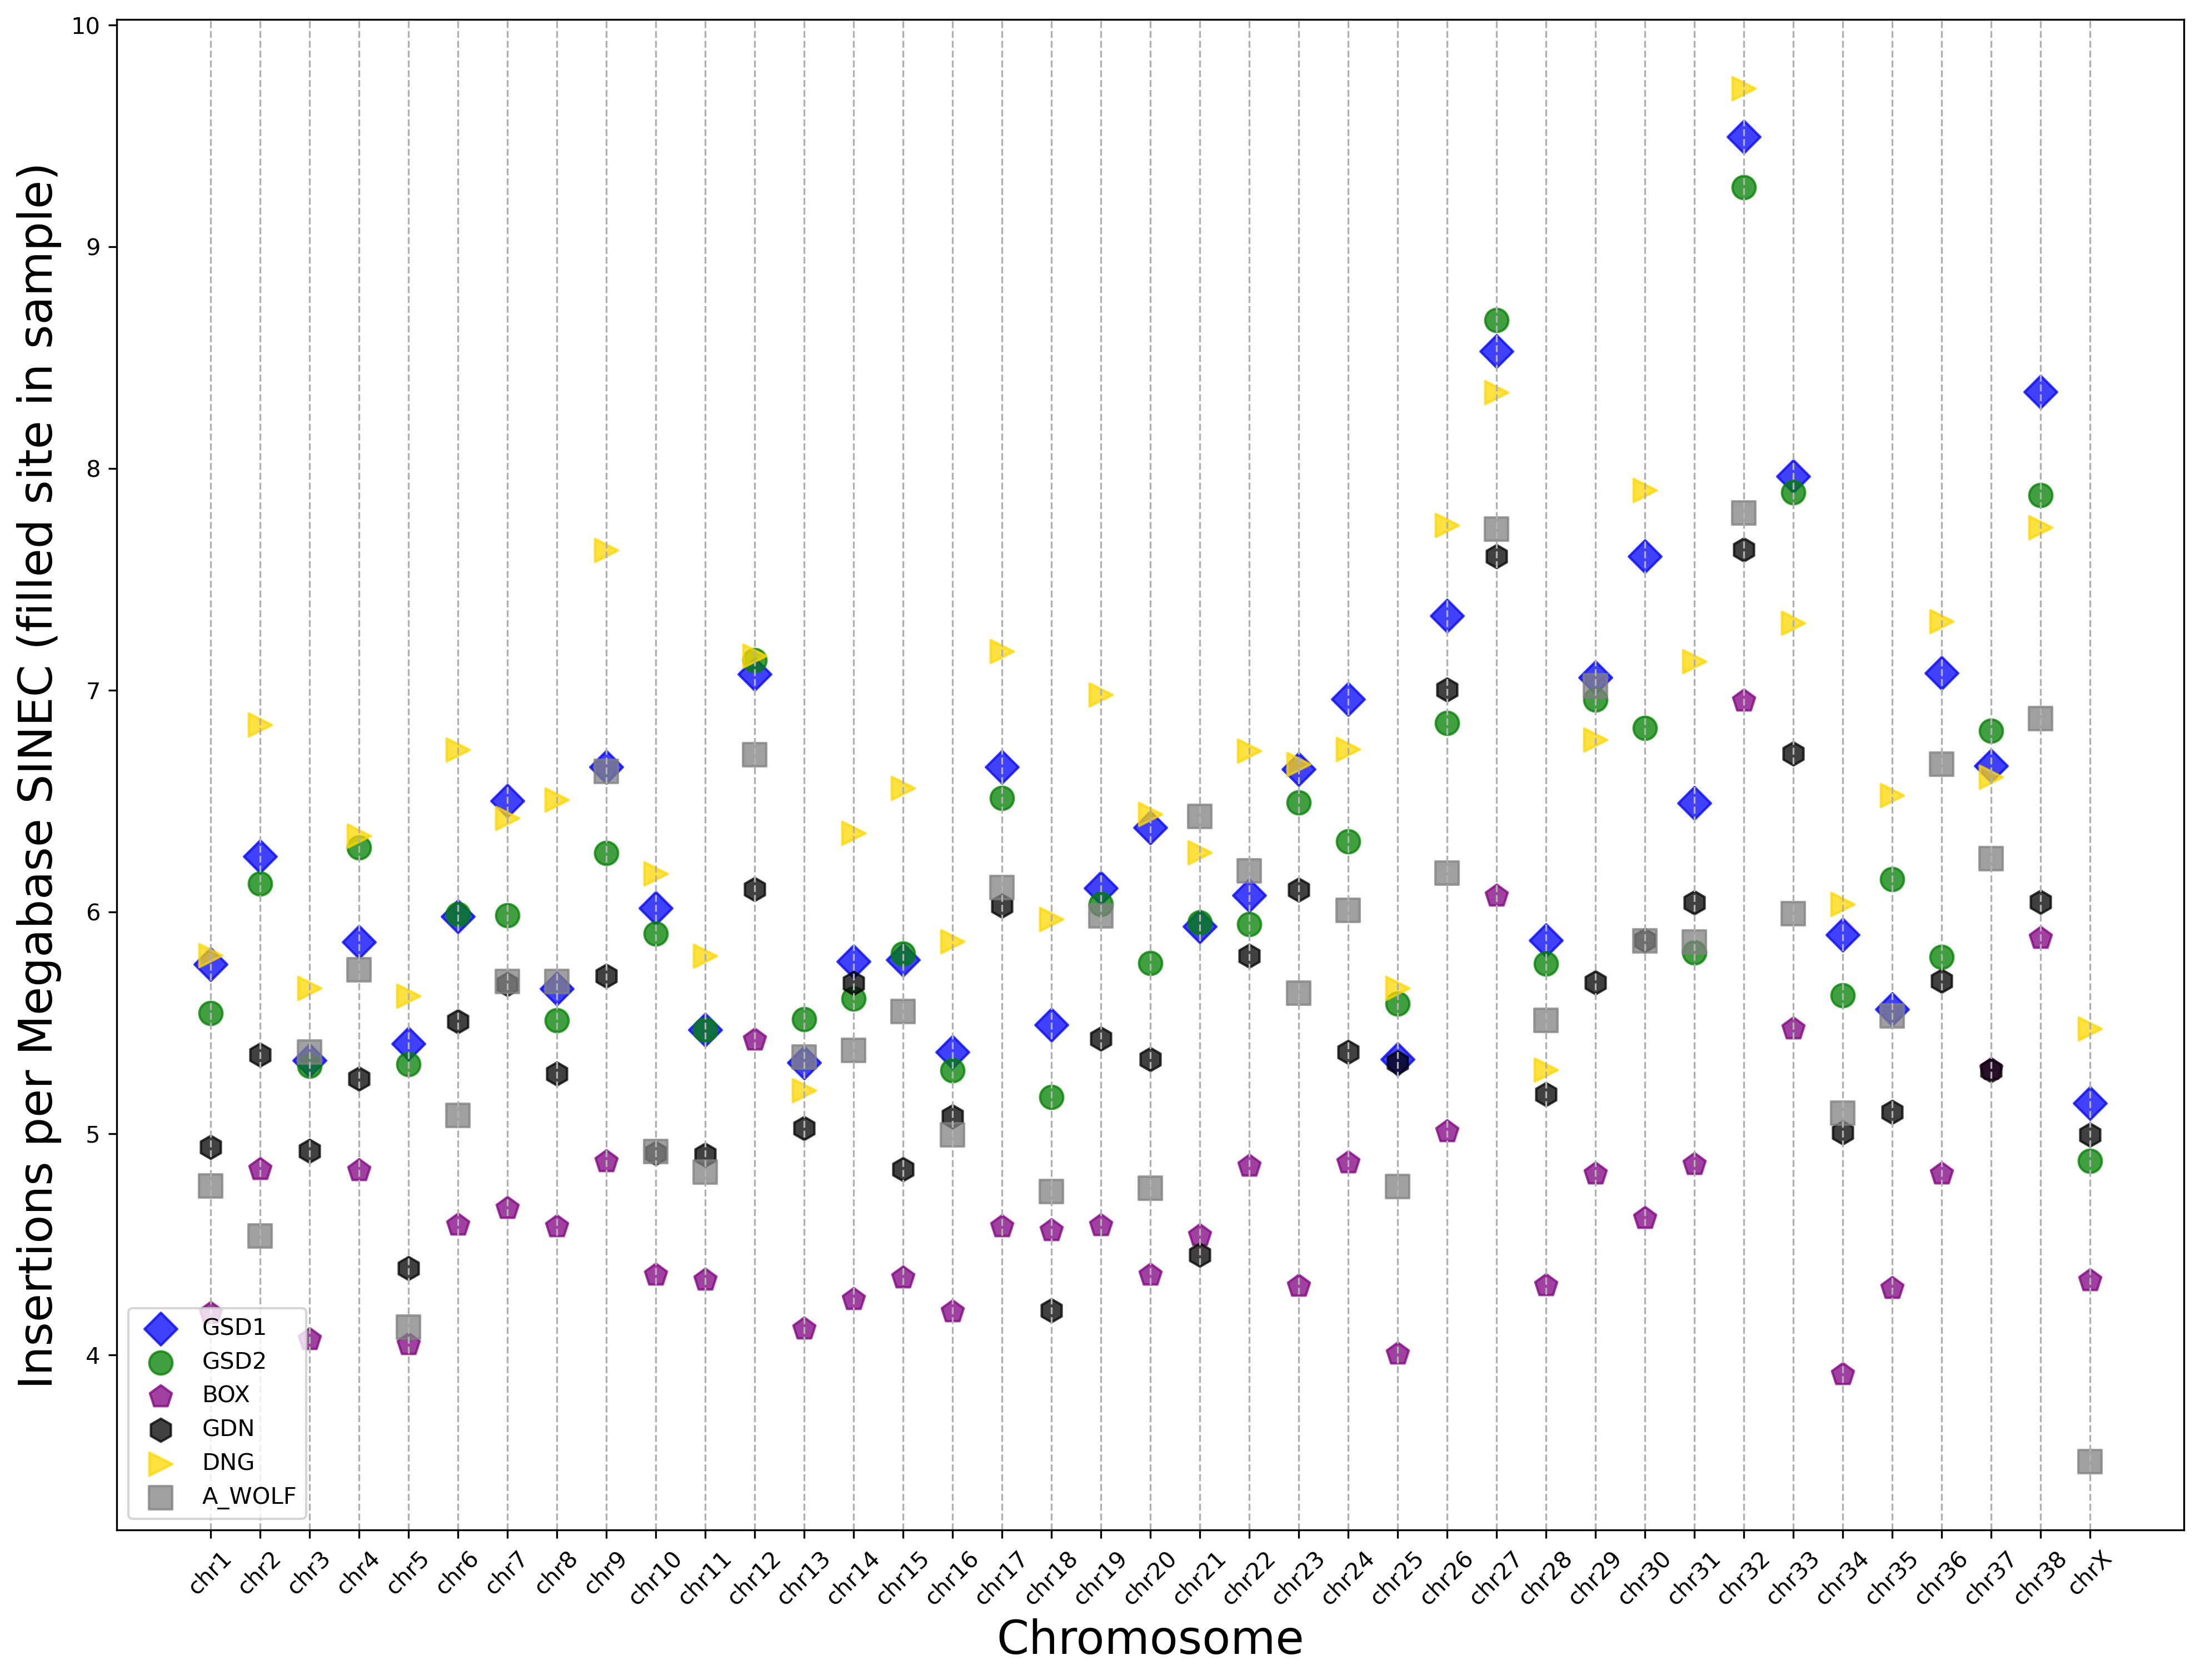

SINEC ['SINEs', 'ref']
Mischka ['SINEs', 'ref']
Nala ['SINEs', 'ref']
Tasha ['SINEs', 'ref']
Zoey ['SINEs', 'ref']
Sandy ['SINEs', 'ref']
Clu ['SINEs', 'ref']
SINEC


<Figure size 432x288 with 0 Axes>

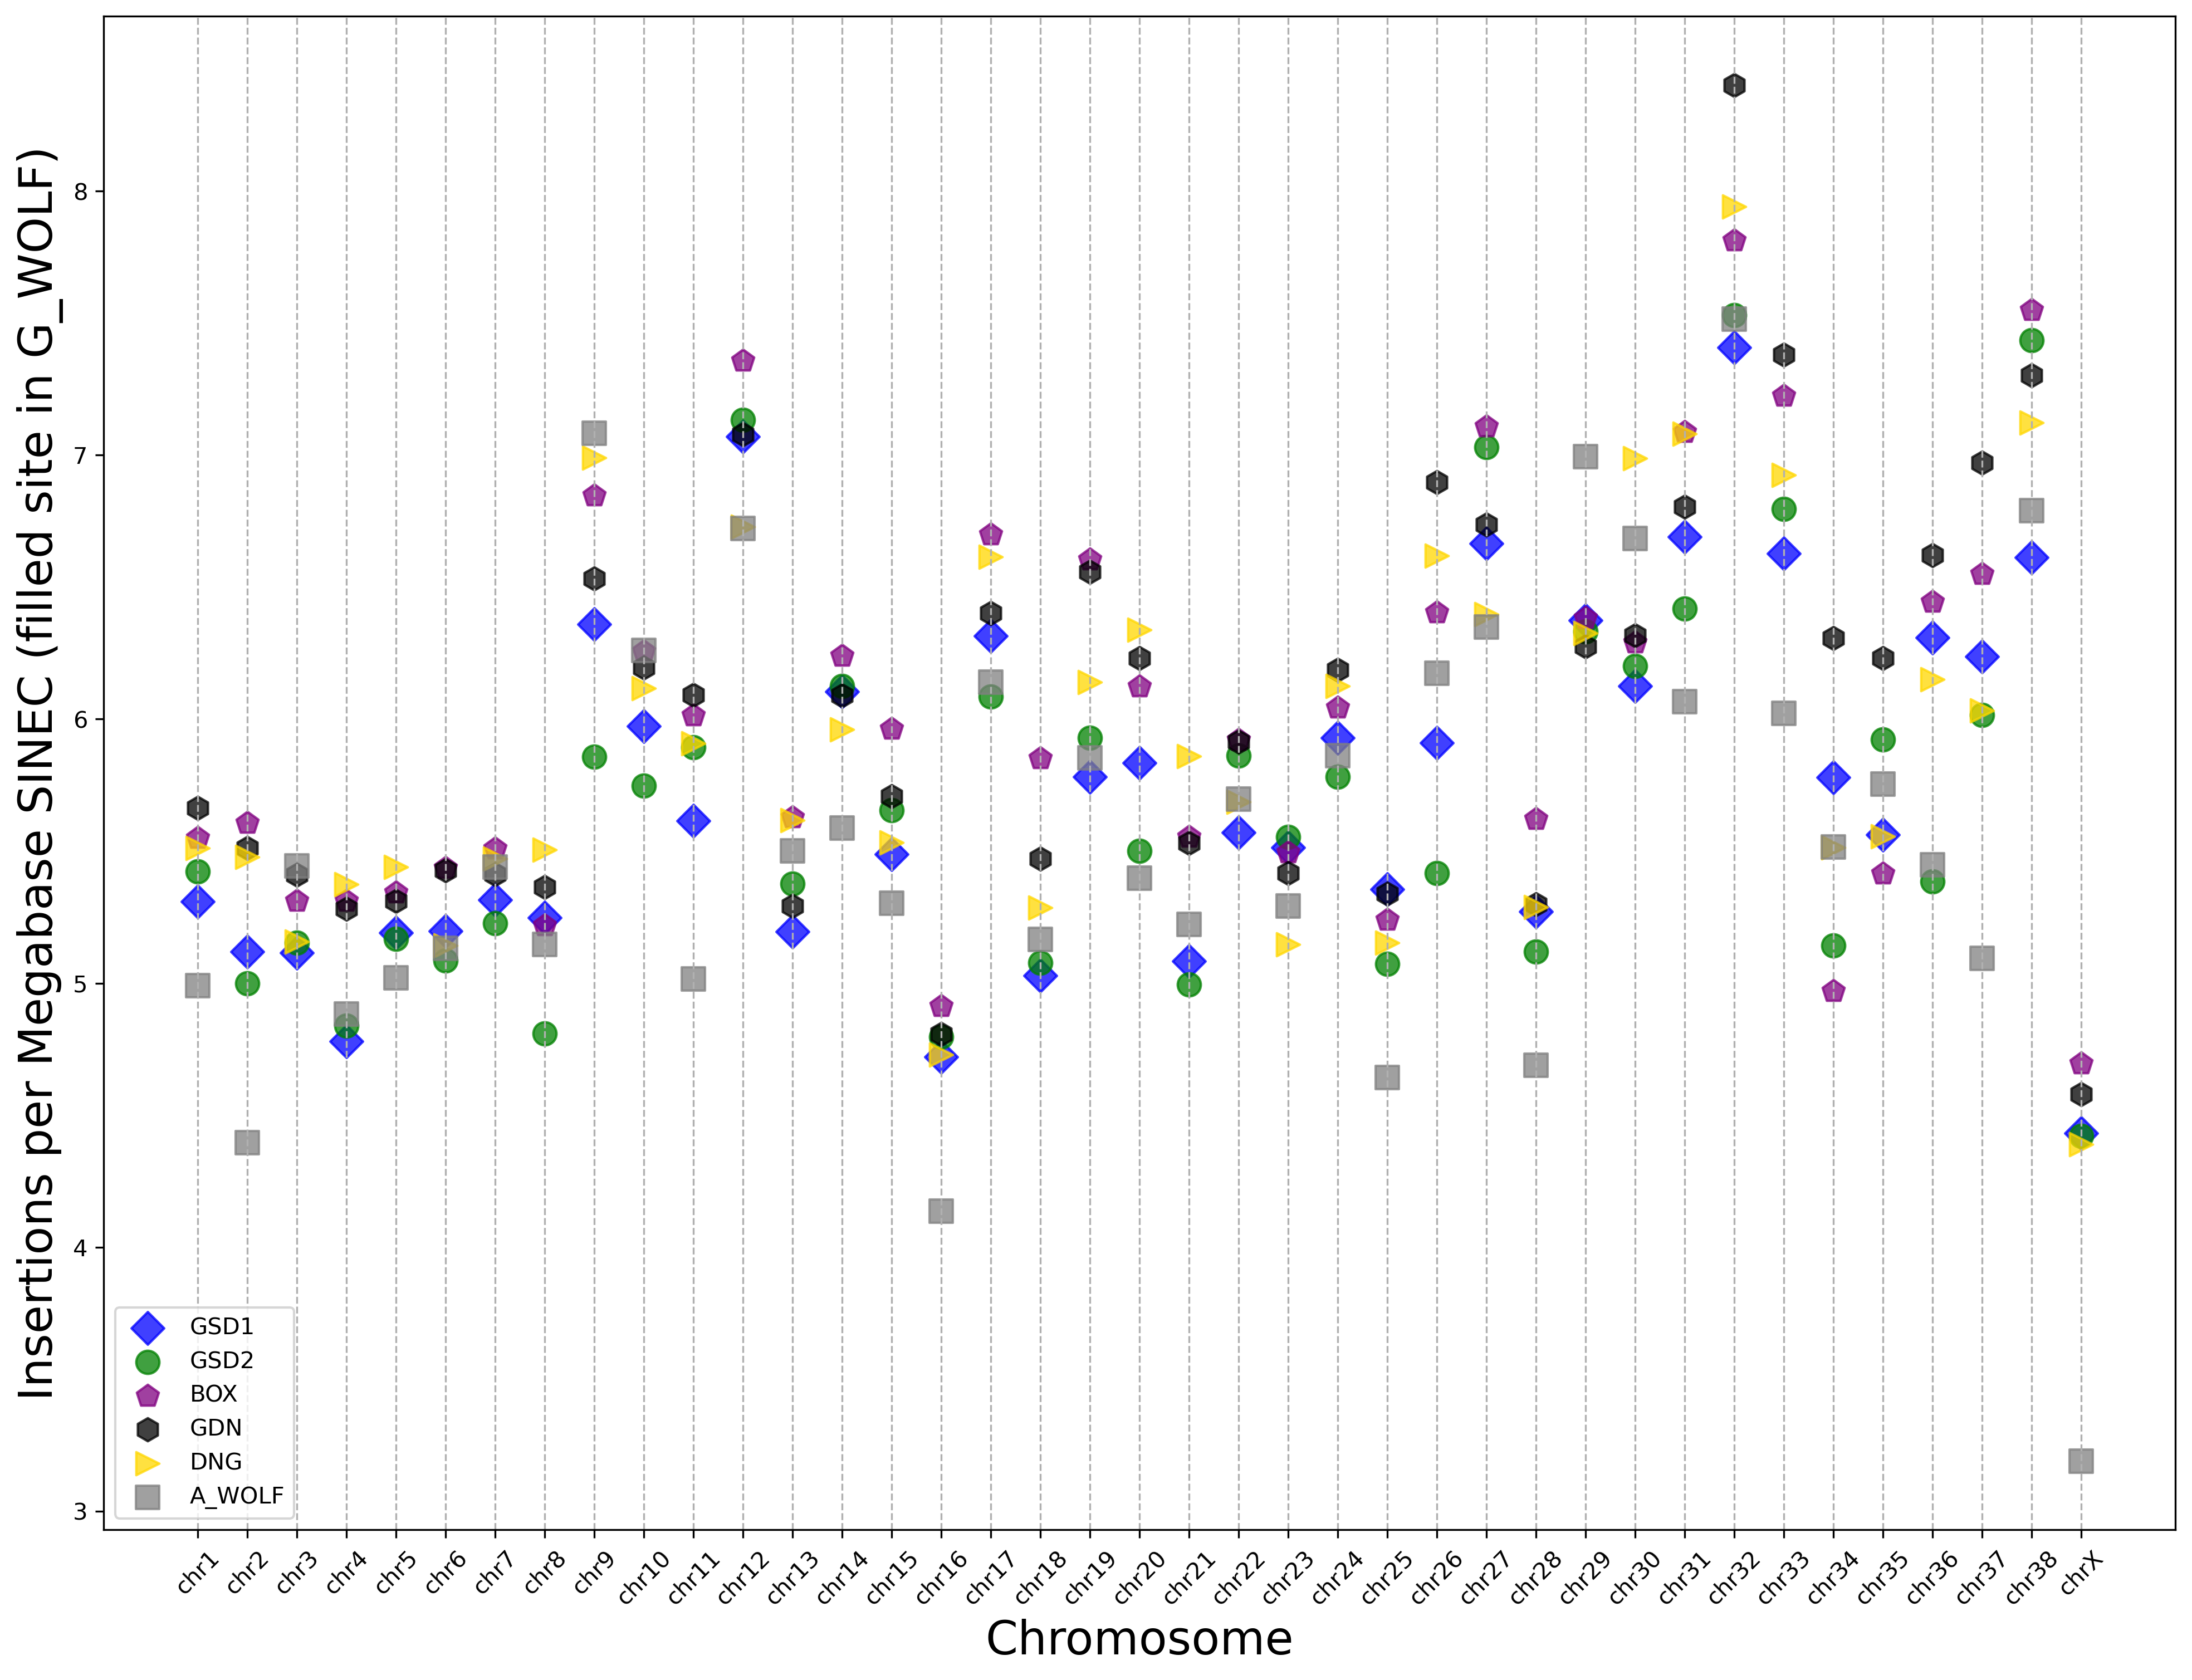

<Figure size 432x288 with 0 Axes>

In [6]:
#create all relevant permutations of file name
TEs = ["LINEs","SINEs"]
States = ['query','ref']


#set parameters for the final plot
TE_index = 0
State_index = 1
permutations = []
for TE in TEs:
    for State in States:
        permutations.append([TE,State])
print(permutations)
list_of_genomes = ["Mischka","Nala","Tasha","Zoey","Sandy","Clu"]
list_for_legend = ['GSD1',"GSD2","BOX","GDN",'DNG',"A_WOLF"]
chrom_list = create_chrom_list()
for permutation in permutations:
    if permutation[TE_index] == "SINEs":
        TE_name = "SINEC"
    elif permutation[TE_index] == "LINEs":
        TE_name = "LINE-1"
    if permutation[State_index] == "ref":
        info = "(filled site in G_WOLF)"
    elif permutation[State_index] == "query":
        info = "(filled site in sample)"
    chrom_dict = {}
    total_dict ={}
    print(TE_name,permutation)
    for genome in list_of_genomes:
        print(genome,permutation)
        chrom_dict = {}
        for item in chrom_list:
            chrom_dict[item] = variants_per_MB_dict[genome][f"{permutation[State_index]}_{permutation[TE_index]}"][item]
        
        total_dict[genome] = chrom_dict
        #print(sum(total_dict[genome].values()))
        #print(chrom_dict)
    #continue
    colors = ['blue','green','purple','black','gold','grey']
    markers = ['D','o','p','h','>','s']
    plt.figure(figsize=(16, 12),dpi=300)
    x_positions = np.arange(len(chrom_list))
    for i in range(len(list_of_genomes)):
        genome = list_of_genomes[i]
        counts = []
        for key in total_dict[genome].keys():
            counts.append(total_dict[genome][key])

        plt.scatter(chrom_list, counts, s=100, color=colors[i],alpha=.75,marker=markers[i]) 
    plt.xticks(x_positions, chrom_list,rotation=45)
    plt.xlabel('Chromosomes')
    #plt.title('Dot plot of SINECs present in sample, absent in G_WOLF, by chrom',size=20)
    plt.grid(axis='x', linestyle='--')
    print(TE_name)
    plt.ylabel(f"Insertions per Megabase {TE_name} {info}",size=20)
    #plt.ylim(0,max_height)
    plt.xlabel("Chromosome",size=20)
    plt.legend(list_for_legend,loc='lower left')
    #if not os.path.exists(f"{dir_of_interest}/chrom_scatterplots"):
    #    os.mkdir(f"{dir_of_interest}/chrom_scatterplots")
    #plt.savefig(f"{dir_of_interest}/chrom_scatterplots/{permutation[TE_index]}_{permutation[State_index]}.png")
    plt.show()
    plt.clf()
    #plt.show()

In [7]:
#Check for the fraction of loci with left_TSD, right_TSD, and empty site being identical
dir_contents = os.listdir(directory)
all_vals = []
for content in dir_contents:
    if not content.endswith("processed_filtered.bed"):
        continue
    infile = open(f"{directory}/{content}",'rt')
    total = 0
    mismatch = 0
    for line in infile.readlines()[1::]:
        if line.split()[-5] == "True":
            mismatch+=1#print(line.split()[-4])
        total+=1
    print(1-(mismatch/total))
    all_vals.append(1-(mismatch/total))
    infile.close()
print(min(all_vals))

1.0
0.9996819085487078
0.9988358556461001
1.0
1.0
0.999531286618233
0.999860743629021
0.9994903160040775
0.999906023869937
1.0
0.9989077007099946
0.9998518957345972
0.9997734138972809
0.9993464052287582
1.0
0.9997064435637751
0.9999241274658573
0.9994678020223523
0.9997937151894383
1.0
0.9998679606522743
0.9998417345889056
0.9997805734347571
1.0
0.9988358556461001


In [8]:
def check_for_TSD_in_subfamilies(input_file):
    infile = open(input_file,'rt')
    dict_of_subfamilies = {}
    for line in infile.readlines():
        #print(line)

        if line.startswith("#"):#identify the left TSD and the subfamily columns
            line = line.split()
            for i in range(len(line)):
                if line[i] == "left_TSD_filled":
                    TSD_column = i
                elif line[i] == "RM_subfamilies":
                    RM_column = i
            continue
            
        line = line.split()#identify the subfamily if and only if one subfamily is present at the locus
        if len(set(line[RM_column].split('\\'))) == 1:
            RM_name = line[RM_column].split('\\')[0]
        else:
            continue #no unique subfamily
        

        TSD_info = line[TSD_column].split("\\")#calculate the length of the TSD. Include no tsd as 0
        if "N" in TSD_info[0]:
            TSD_len = 0
        else:
            TSD_len = int(TSD_info[1]) - int(TSD_info[0]) + 1
       
        #add to dictionary
        #if TSD_len < 10:
        if RM_name not in dict_of_subfamilies.keys():
                #if TESD
            dict_of_subfamilies[RM_name] = [TSD_len]
        else:
            dict_of_subfamilies[RM_name].append(TSD_len)
            
            
    
    print(dict_of_subfamilies)
    
    #get the average TSD length
    for key in dict_of_subfamilies.keys():
        print(key,len(dict_of_subfamilies[key]),sum(dict_of_subfamilies[key])/len(dict_of_subfamilies[key]))
for content in dir_contents:
    if not content.endswith("processed_filtered.bed"):
        continue
    if "Mischka" not in content:
        continue
    if "query" not in content:
        continue
    if "LINE" not in content:
        continue
    check_for_TSD_in_subfamilies(f"{directory}/{content}")

{'L1_Cf': [4, 14, 6, 12, 2, 15, 5, 17, 14, 17, 16, 16, 13, 15, 0, 9, 7, 17, 14, 16, 3, 15, 16, 12, 15, 18, 16, 11, 17, 14, 1, 0, 12, 9, 7, 0, 11, 5, 17, 15, 16, 10, 11, 14, 14, 1, 15, 9, 15, 14, 6, 14, 13, 11, 16, 12, 13, 14, 13, 14, 20, 15, 13, 7, 14, 15, 16, 16, 3, 15, 15, 16, 16, 2, 0, 17, 17, 15, 16, 9, 15, 6, 14, 7, 15, 15, 4, 11, 15, 2, 13, 11, 8, 1, 0, 10, 16, 15, 17, 16, 0, 14, 15, 16, 16, 8, 9, 16, 16, 5, 13, 17, 4, 20, 17, 14, 15, 11, 14, 13, 13, 0, 15, 16, 16, 14, 3, 8, 13, 13, 16, 0, 6, 8, 10, 19, 2, 1, 9, 16, 10, 16, 1, 16, 6, 15, 11, 19, 15, 15, 13, 15, 7, 12, 11, 17, 2, 15, 16, 14, 16, 5, 26, 15, 1, 9, 13, 6, 16, 15, 38, 6, 15, 0, 14, 10, 15, 6, 15, 15, 9, 18, 15, 14, 15, 15, 14, 13, 17, 12, 7, 16, 5, 5, 14, 16, 14, 15, 2, 16, 10, 15, 0, 15, 13, 1, 14, 17, 18, 17, 0, 0, 29, 15, 11, 14, 14, 15, 14, 20, 15, 13, 15, 15, 1, 3, 15, 8, 17, 15, 1, 15, 15, 14, 15, 0, 10, 15, 17, 1, 15, 1, 18, 15, 18, 5, 3, 23, 12, 0, 9, 0, 14, 1, 18, 16, 15, 11, 5, 14, 17, 16, 4, 12, 14, 14, 12,

In [9]:
def process_file(input_file):
    infile = open(input_file,'rt')
    columns = []
    rows = []
    lines = []
    for line in infile.readlines():#uses all variants in the dataset. This includes "RM fail" 
        #print(line)
        if line.startswith("#"):
            #print(line[1::])
            for element in enumerate(line[1::].split()):
                rows.append(element[0])
                columns.append(element[1])
        else:
            lines.append(line.split())
        df = pd.DataFrame(lines,columns=list(columns))
        pandas_columns = len(df.columns.tolist())
    print(df.shape)
    infile.close()
    return df
    

x = process_file(f"{directory}/Mischka_mCanlor_SV_query_filled_intersect_with_LINEs_processed_filtered.bed")

(1962, 38)


1962 (100.0% of) variants are at least 50 bp long.
1864 (95.00509683995922% of) variants are at least 100 bp long.
1068 (54.43425076452599% of) variants are at least 500 bp long.
826 (42.09989806320081% of) variants are at least 1000 bp long.
631 (32.16106014271152% of) variants are at least 2000 bp long.
563 (28.69520897043833% of) variants are at least 3000 bp long.
535 (27.268093781855253% of) variants are at least 4000 bp long.
509 (25.942915392456676% of) variants are at least 5000 bp long.
494 (25.178389398572886% of) variants are at least 6000 bp long.


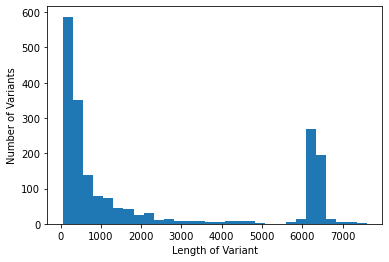

In [10]:
#print(x)
lengths = []
for row in x.itertuples():
    lengths.append(int(row.Refined_Filled_end)-int(row.Refined_Filled_start)+1)
    #print(x.Filled_start)
plt.hist(lengths,bins=30)
plt.xlabel("Length of Variant")
plt.ylabel("Number of Variants")
plt.savefig(f"{directory}/Fig_Save/Filtered_Variant_Lenght_LINE1_Mischka.png",dpi=300,bbox_inches="tight")

filtered_lengths = [50,100,500,1000,2000,3000,4000,5000,6000]
for filtered_length in filtered_lengths:
    current = 0
    for length in lengths:
        if length >= filtered_length:
            current+=1
    print(f"{current} ({current/len(lengths)*100}% of) variants are at least {filtered_length} bp long.")